# Intro to Statistical Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
!pip install statsmodels

In [7]:
import statsmodels.api as sm

In [6]:
df = sm.datasets.macrodata.load_pandas().data

In [7]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [8]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [9]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

In [10]:
df.index = index

In [11]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<Axes: >

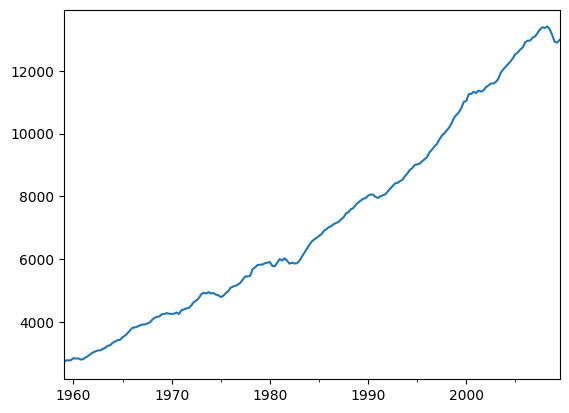

In [12]:
df['realgdp'].plot()

In [15]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])

In [17]:
df['trend'] = gdp_trend

<Axes: >

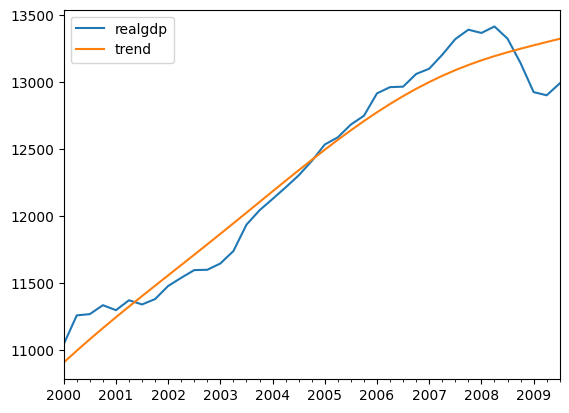

In [19]:
df[['realgdp', 'trend']]["2000-03-31":].plot()

In [16]:
type(result)

tuple

# Exponential Weighted Moving Average Models (EWMA)

In [22]:
airline = pd.read_csv('airline-passengers.csv', index_col="Month")

In [23]:
airline.dropna(inplace=True)

In [24]:
airline.index = pd.to_datetime(airline.index)

In [25]:
airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [26]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [28]:
airline['6-month-SMA'] = airline['Passengers'].rolling(window=6).mean()

In [29]:
airline['12-month-SMA'] = airline['Passengers'].rolling(window=12).mean()

<Axes: xlabel='Month'>

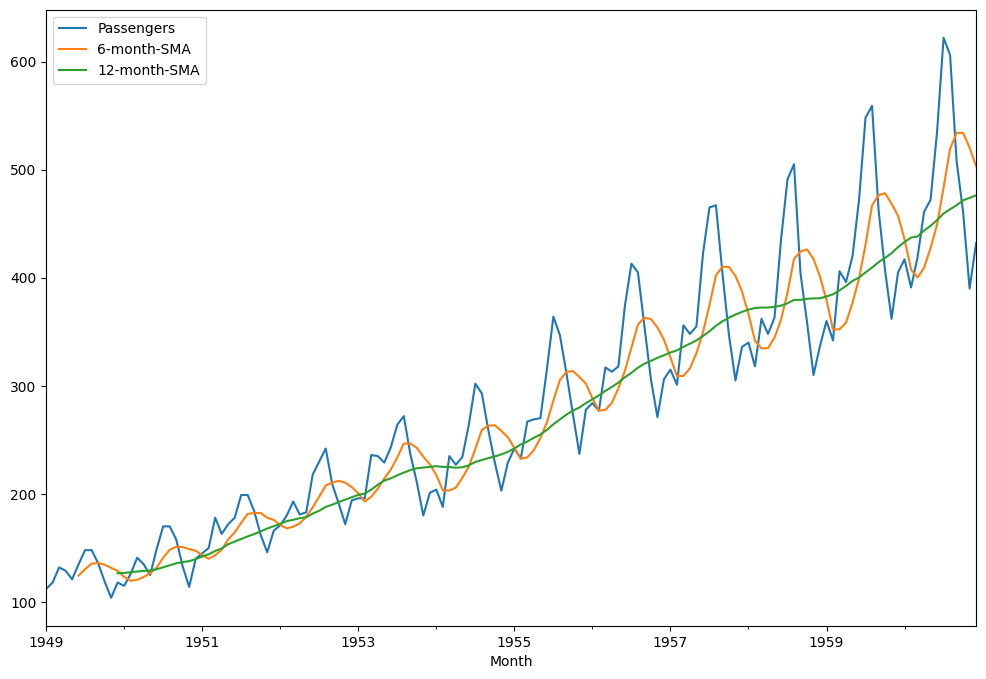

In [31]:
airline.plot(figsize=(12, 8))

In [32]:
airline['EWMA-12'] = airline["Passengers"].ewm(span=12).mean()

<Axes: xlabel='Month'>

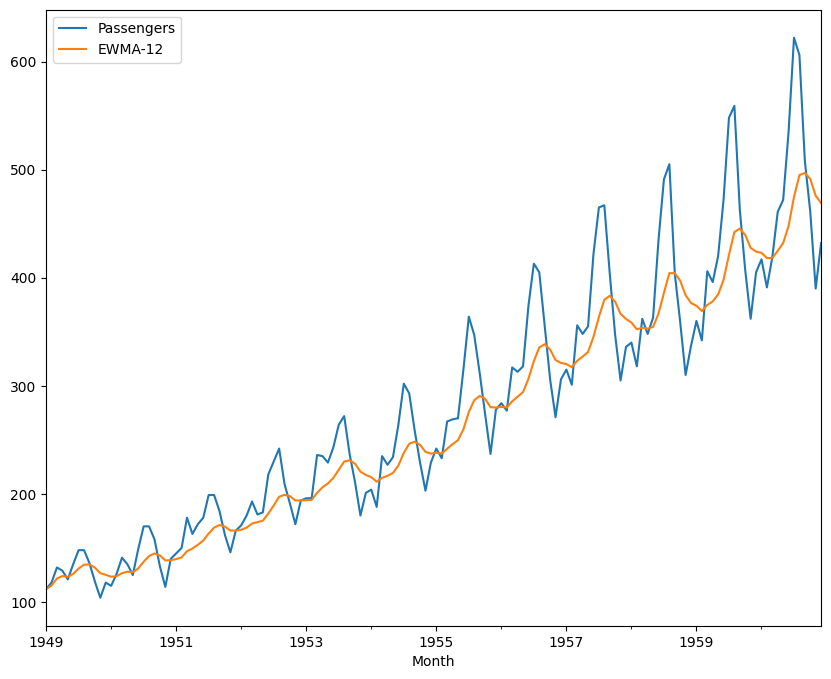

In [34]:
airline[['Passengers', 'EWMA-12']].plot(figsize=(10, 8))

# ETS - Error-Trend-Seasonality

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
airline = pd.read_csv('airline-passengers.csv', index_col='Month')

In [3]:
airline.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


<Axes: xlabel='Month'>

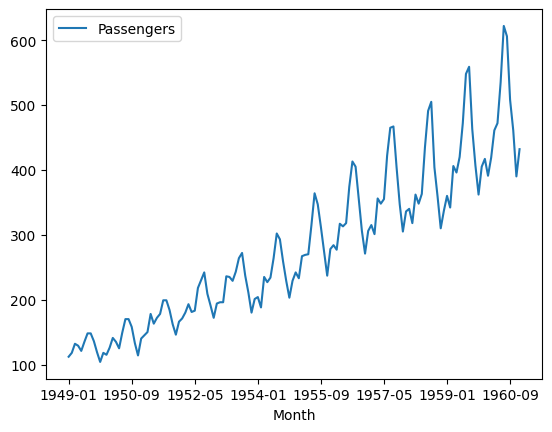

In [4]:
airline.plot()

In [18]:
airline.index = pd.to_datetime(airline.index)

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
result = seasonal_decompose(airline['Passengers'], model='additive')

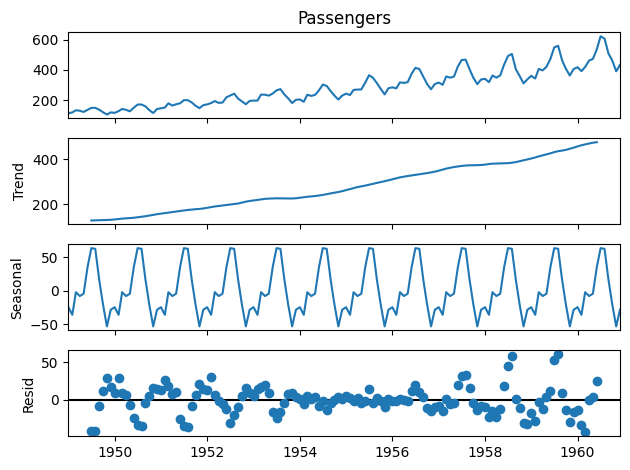

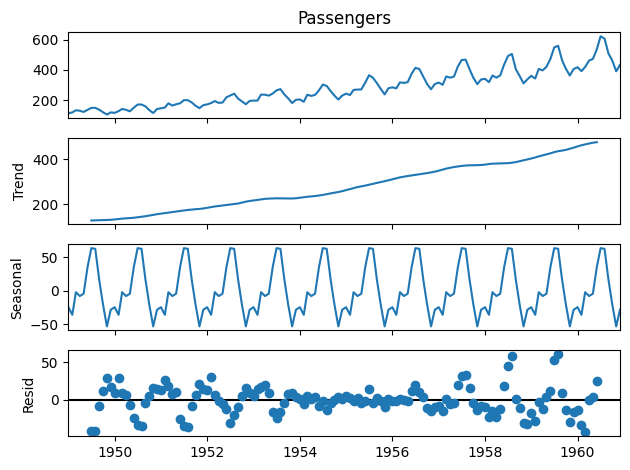

In [22]:
result.plot()